In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Images

In [2]:
images = []
labels = []
for i in range(10):
    for filename in os.listdir('imgs/train/c'+str(i)):
        img = cv2.imread(str('imgs/train/c'+str(i)+'/'+filename))
        labels.append(i)
        #img = cv2.resize(img, (100,100))/255
        #print(img.shape)
        images.append(img)

In [3]:
#im = np.asarray(images)

In [4]:
images[0].shape

(480, 640, 3)

In [5]:
for image in images:
    image.dtype = np.uint8 

images[0].dtype

dtype('uint8')

3


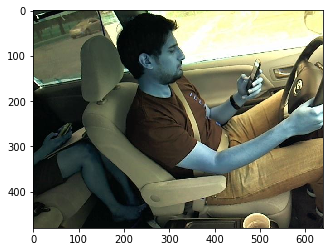

In [11]:
print(labels[7210])
plt.imshow(images[7210])

### Detecting Skin 

In [12]:
def extractSkin(image):
    img = image.copy()
    # changing the color space from bgr to hsv
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    lower = np.array([0, 0, 0], dtype = "uint8")
    upper = np.array([80, 255, 255], dtype = "uint8")
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    
    skinMask = cv2.inRange(img, lower,upper)
    skinMask = cv2.erode(skinMask, kernel, iterations=2)
    skinMask = cv2.dilate(skinMask,kernel, iterations=2)
    skinMask = cv2.GaussianBlur(skinMask,(3,3),0)
    skin = cv2.bitwise_and(img,img,mask=skinMask)
    
    return (cv2.cvtColor(skin,cv2.COLOR_HSV2RGB))

In [13]:
#pixel intensities to be considered skin

In [14]:
converted = []
for i in range(len(images)):
    images[i] = extractSkin(images[i])

3


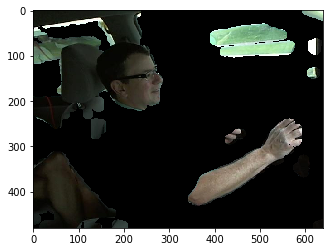

In [17]:
print(labels[9201])
plt.imshow(images[9201])

In [51]:
for img in images:
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.resize(img, (100,100))/256

3


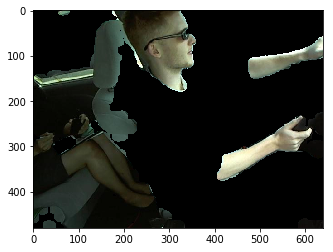

In [56]:
print(labels[7073])
plt.imshow(images[0])

In [63]:
count = 20294
for i in range(20295,len(labels)):
    if labels[i] != 9:
        break
    else:
        count = count+1
count

22423

In [64]:
for i in range(0,2489):
    cv2.imwrite("c0_"+str(i)+".jpg",images[i])


In [65]:
for i in range(2489,4756):
    cv2.imwrite("c1_"+str(i)+".jpg",images[i])

In [66]:
for i in range(4756,7073):
    cv2.imwrite("c2_"+str(i)+".jpg",images[i])

In [67]:
for i in range(7073,9419):
    cv2.imwrite("c3_"+str(i)+".jpg",images[i])

In [68]:
for i in range(9419,11745):
    cv2.imwrite("c4_"+str(i)+".jpg",images[i])

In [69]:
for i in range(11745,14057):
    cv2.imwrite("c5_"+str(i)+".jpg",images[i])

In [70]:
for i in range(14057,16382):
    cv2.imwrite("c6_"+str(i)+".jpg",images[i])

In [71]:
for i in range(16382,18384):
    cv2.imwrite("c7_"+str(i)+".jpg",images[i])

In [72]:
for i in range(18384,20295):
    cv2.imwrite("c8_"+str(i)+".jpg",images[i])

In [73]:
for i in range(20295,len(images)):
    cv2.imwrite("c9_"+str(i)+".jpg",images[i])

In [ ]:
plt.imshow(images[54])